# 1 TESS phase curve modelling
## Case a: Mixed reflectance and thermal emission

**Author:** Hannu Parviainen<br>
**Last edited:** 2.8.2021

Here we model the KELT-1 TESS light curve using a full phase curve model that includes the transit, secondary eclipse, thermal emission, reflection, ellipsoidal variations and Doppler boosting. 

The time-dependent systematics are modelled using a Gaussian process (GP). The GP hyperparameters are optimised with the other model parameters, and later marginalised over in MCMC sampling.

In this base case we don't constrain the geometric albedo or the planet's day-side flux ratio (we do this in the later cases). These two parameters should be linearly correlated since they are the main parameters affecting the eclipse depth, but it is useful to see their joint posterior.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from corner import corner
from src.tesslpf import K1TESSLPF

## Initialisation

In [3]:
lpf = K1TESSLPF('a-unconstrained')

In [5]:
lpf.ps

[  0 |G| tc             N(μ = 2458765.5337, σ = 0.05)            [    -inf ..      inf],
   1 |G| p              N(μ = 1.2174928, σ = 0.001)              [    0.00 ..      inf],
   2 |G| rho            U(a = 0.1, b = 1.0)                      [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             U(a = 0.0025000000000000005, b = 0.0225) [    0.00 ..      inf],
   7 |G| aev            U(a = 0.0, b = 0.0006)                   [    0.00 ..      inf],
   8 |G| adb            N(μ = 4.1e-05, σ = 3e-06)                [    0.00 ..      inf],
   9 |G| ted            U(a = 0.0, b = 0.2)                      [    -inf ..      inf],
  10 |G| ten            U(a = 0.0, b = 0.1)                      [    -inf ..      inf],
  11 |G| teo         

## Optimisation

We start with a global optimisation run that draws a number of parameter vectors from the prior and clumps them close to the global posterior mode. We could use a local optimiser as well, but a global one is a bit more reliable when fitting the GP hyperparameters together with everything else.

Global optimisation:   0%|          | 0/250 [00:00<?, ?it/s]

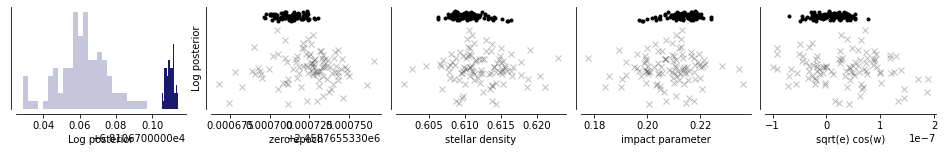

In [12]:
lpf.optimize_global(2500, npop=100)

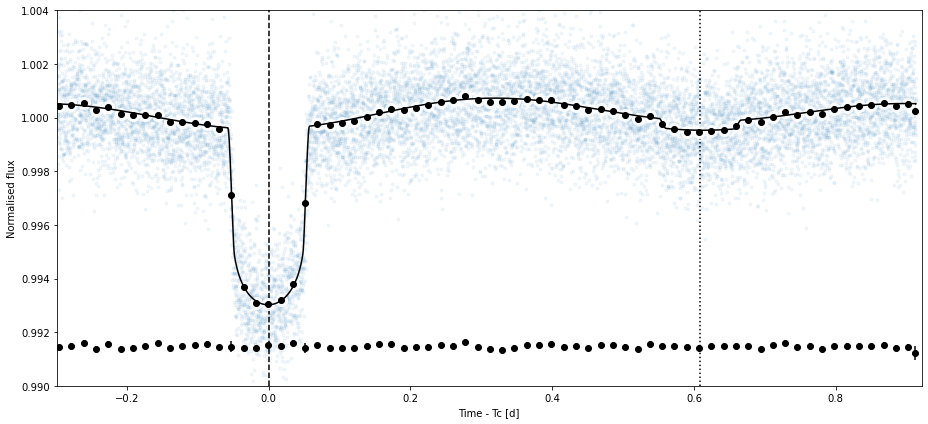

In [13]:
fig = lpf.plot_folded_transit(ylim=(0.99, 1.004), binwidth=25, remove_baseline=True, offset=0.25);

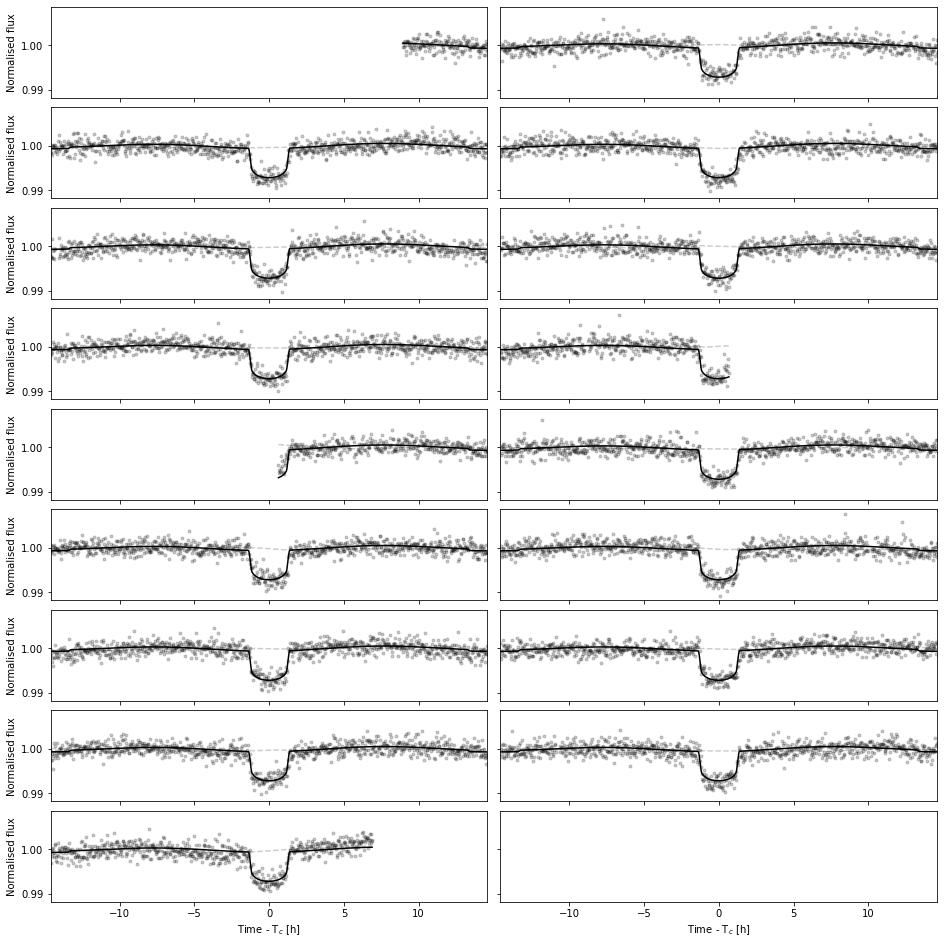

In [14]:
lpf.plot_individual_transits(figsize=(13,13));

## MCMC Sampling

In [15]:
lpf.sample_mcmc(5000, thin=50, repeats=4, save=True)

MCMC sampling:   0%|          | 0/4 [00:00<?, ?it/s]

Run 1/4:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/4:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 3/4:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 4/4:   0%|          | 0/5000 [00:00<?, ?it/s]

In [27]:
lpf.sample_mcmc(15000, thin=50, repeats=1, save=True)

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/15000 [00:00<?, ?it/s]

## Posterior overview

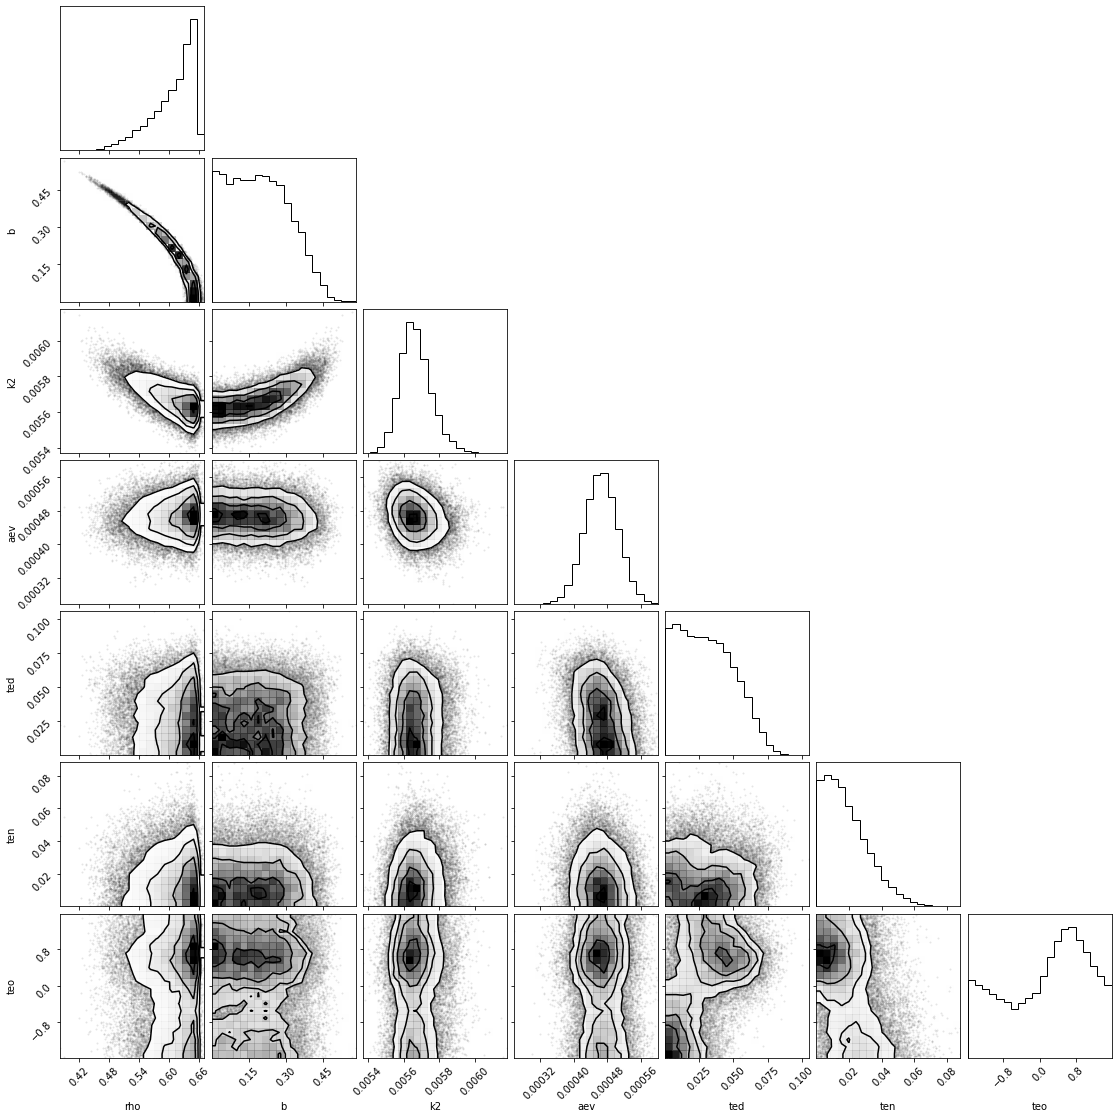

In [28]:
df = lpf.posterior_samples()
pids = [2, 3, 6, 7, 9, 10, 11]
corner(df.iloc[:,pids], labels=df.columns[pids]);

---


<center>&copy;2021 Hannu Parviainen</center>